In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
color_img = Image.open('/content/drive/MyDrive/KDT/data/Image/fruits.jpg')

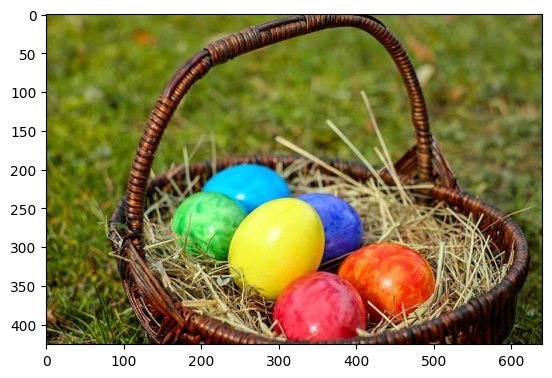

In [5]:
# Pillow Image 객체를 이용해서 간단하게 출력할 수 있어요!
plt.imshow(color_img)
plt.show()

array([[[108, 117,   0],
        [112, 121,   4],
        [113, 122,   5],
        ...,
        [125, 123,  62],
        [111, 116,  50],
        [104, 111,  44]],

       [[107, 116,   1],
        [111, 120,   3],
        [111, 120,   5],
        ...,
        [121, 121,  59],
        [109, 114,  48],
        [102, 109,  42]],

       [[106, 114,   2],
        [109, 118,   3],
        [109, 117,   5],
        ...,
        [118, 120,  57],
        [108, 115,  48],
        [101, 110,  43]],

       ...,

       [[124, 108,  74],
        [109,  96,  62],
        [ 52,  46,  20],
        ...,
        [ 22,  23,   0],
        [ 32,  34,   0],
        [ 56,  58,  18]],

       [[135, 119,  86],
        [108,  95,  63],
        [ 39,  35,  10],
        ...,
        [ 19,  23,   0],
        [ 46,  48,   9],
        [ 58,  60,  20]],

       [[127, 111,  78],
        [129, 115,  86],
        [ 88,  84,  59],
        ...,
        [ 37,  41,   8],
        [ 60,  62,  23],
        [ 64,  66,  26]]], dtype=uint8)
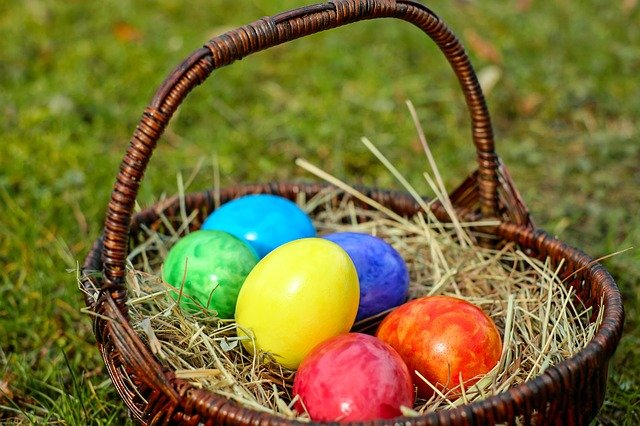

In [11]:
# Pillow Image 객체를 이용해서
# 이미지의 Pixel 정보를 추출할 수 있어요!
color_pixel = np.array(color_img)
color_pixel

(426, 640, 3)


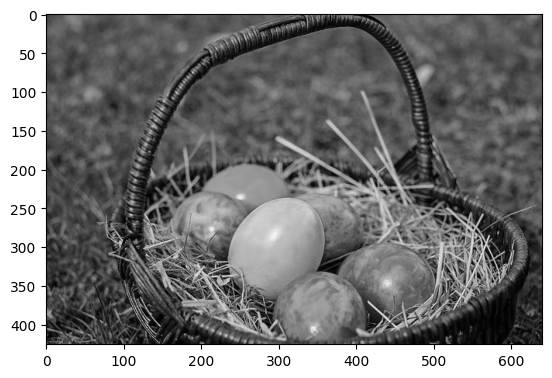

In [31]:
# 현재 color 이미지에요!
# gray scale image로 바꿔보아요!
# 각 pixel의 RGB 값을 평균을 내서 그 값으로 RGB값을 다시 설정
gray_pixel = color_pixel.copy()

for y in range(gray_pixel.shape[0]):
    for x in range(gray_pixel.shape[1]):
        gray_pixel[y, x] = int(np.mean(gray_pixel[y, x]))

print(gray_pixel.shape)
plt.imshow(gray_pixel)
plt.show()

(426, 640, 1)


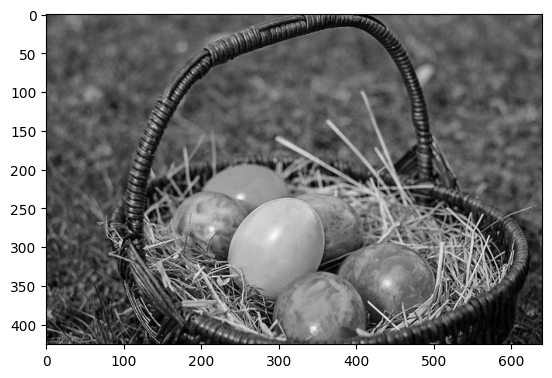

In [32]:
# 이런 이미지는 데이터량이 너무 많아요!
# 어떻게 하면 데이터량을 줄일 수 있을까요?
# 흑백이미지 같은 경우 3차원인데
# (height, width, 1) 이렇게 표현이 가능
gray_3d_1channel = gray_pixel[:,:,0:1]
print(gray_3d_1channel.shape) # (426, 640, 1)

plt.imshow(gray_3d_1channel, cmap='gray') # cmap 안쓰면 이상해짐
plt.show()

(426, 640)


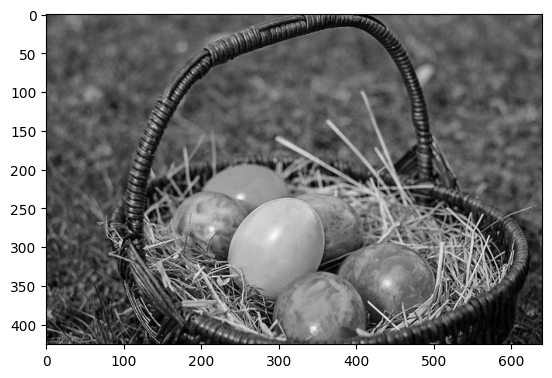

In [35]:
# 흑백이미지는 2차원으로 표현이 가능해요!
gray_2d = gray_pixel[:,:,0]
print(gray_2d.shape) # (426, 640)

plt.imshow(gray_2d, cmap='gray')
plt.show()

In [ ]:
# 기존에 사용했던 MNIST Data Set에 대해서 다시 한번 알아보아요!
# MNIST
# 일단 흑백이미지. 2차원으로 표현한 이미지 데이터
# 28 x 28 = 784의 pixel로 구성된 이미지
# 각 이미지는 숫자 0~9까지 중 하나의 숫자를 target으로 가지고 있어요!
# 이런 이미지 데이터가 많이 있어요
# 전체 데이터 shape => 3차원이 되요!
# 하지만 우리가 사용하는 머신러닝은 입력데이터가
# 2차원이 되어야 해요! 즉, 데이터 1건이 1차원으로 표현되어야 해요!
# 정형데이터인 경우는 이게 일반적이에요!
# 그래서 2차원인 이미지 데이터를 1차원으로 변경해야 해요!
# 공간 정보가 날아가요!

# 그래서 MNIST Data는 2차원 데이터를 1차원으로 변경해서
# CSV 파일로 제공하고 있어요!

In [61]:
# %reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L1, L2

from sklearn.metrics import classification_report

In [66]:
# Raw Data loading
df = pd.read_csv('/content/drive/MyDrive/KDT/kaggle/Digit Recognizer/01. train.csv')
display(df.head())
print(df.shape)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42000, 785)


In [67]:
# 데이터 전처리 및 feature engineering
# 결측치와 이상치가 없어요!

# 정규화를 진행해야 하는데 데이터를 분할하고 정규화를 진행!
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values.reshape(-1, 1)

# t_data가 label을 의미하는데 각 class의 비율을 일단 먼저 알아보아요!
print(np.unique(df['label'].values, return_counts=True)) # 데이터 불균형 x

# 데이터 분할
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(x_data,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=42)

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188]))


In [68]:
# Model 구현
model = Sequential()

# 지금 현재는 이미지(28x28)의 데이터는 1차원으로 변경해서 입력으로 넣을거에요!
# 784개의 데이터를 가진 1차원 데이터가 입력으로 사용될거에요!
model.add(Flatten(input_shape=(784,)))

# Hidden Layer 추가 => DNN (Deep Neural Network)
# Batch Normalization => 처음에 데이터에 대한 정규화 말고 학습 중간에 (레이어 안에서)
#                        결과 데이터에 대해서 다시 정규화를 진행
#                        Layer 안에서 Activation하기 전에 처리해주면 되요!
# Keras에서는 이 기능을 Layer로 만들어서 제공!
# activation 작업도 Dense 안에서 설정으로 처리하는게 아니라
# 별도의 Layer로 처리하도록 제공!
from tensorflow.keras.layers import Activation, BatchNormalization, Dropout

model.add(Dense(units=64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=128,
                activation='relu'))
model.add(Dropout(rate=0.5))

# Dense Layer는 기본적으로 W의 초기화를 글로럿(Xavier) 초기화를 이용해요!
# 많이 사용되는 초기화
# 1. glorot_normal : 글로럿 초기화 방식(Xavier 초기화 방식)
# 2. he_normal : He's 초기화 방식
# 3. lecun_normal : 르쿤 초기화 방식
# 4. random_normal : 랜덤 초기화 방식(정규분포를 사용한 랜덤값을 사용)

# 우리 Dense Layer는 기본적으로 규제를 사용하지 않고 있어요!
# 규제도 적용해서 모델의 최적화를 하면 좋아요!
output_layer = Dense(name='MyDenseLayer', # Layer의 논리적인 이름 설정
                     trainable=True, # W의 값의 변경이 가능하도록 설정 (기본값 True)
                     units=10,
                     kernel_initializer='he_normal', # He's 초기화로 변경
                     kernel_regularizer=L2(l2=0.1),
                     activation='softmax')
print(output_layer.get_config())
model.add(output_layer)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

{'name': 'MyDenseLayer', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 10, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': {'module': 'keras.regularizers', 'class_name': 'L2', 'config': {'l2': 0.1}, 'registered_name': None}, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MyDenseLayer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,106 (234.79 KB)

 Trainable params: 59,978 (234.29 KB)

 Non-trainable params: 128 (512.00 B)

In [74]:
# Model 학습
# 학습이 잘 안되는 경우가 종종 생겨요!
# 모델의 성능이 좋지 않은 대표적인 경우 중 하나는
# Overfitting 현상
# Overfitting을 해결하려면
# 1. 학습데이터의 양을 늘리면 되요!
# 2. feature의 개수를 줄이면 되요!
# 3. Dropout 방식을 이용
# 4. 규제(Weight를 인위적으로 조절해서 우리 모델의 복잡도를 낮추는 방법)
#    L1 규제와 L2 규제가 있어요!

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es_callback = EarlyStopping(monitor='val_loss',
                            patience=5,
                            verbose=1)

cp_callback = ModelCheckpoint(filepath='/content/tmp_checkpoint.weights.h5',
                              save_weights_only=True,
                              save_best_only=True,
                              monitor='val_loss',
                              verbose=1)

history = model.fit(x_data_train_norm,
          t_data_train,
          epochs=100,
          verbose=1,
          callbacks=[es_callback, cp_callback],
          validation_split=0.2)

Epoch 1/100
733/735 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9093 - loss: 0.3441
Epoch 1: val_loss improved from inf to 0.22567, saving model to /content/tmp_checkpoint.weights.h5
735/735 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9093 - loss: 0.3441 - val_accuracy: 0.9444 - val_loss: 0.2257
Epoch 2/100
721/735 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9102 - loss: 0.3486
Epoch 2: val_loss improved from 0.22567 to 0.22228, saving model to /content/tmp_checkpoint.weights.h5
735/735 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9102 - loss: 0.3487 - val_accuracy: 0.9434 - val_loss: 0.2223
Epoch 3/100
731/735 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9086 - loss: 0.3499
Epoch 3: val_loss did not improve from 0.22228
735/735 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9087 - loss: 0.3499 - val_accuracy: 0.9442 - val_loss: 0.2238
Epoch 4/100
733/735 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9051 - loss: 0.3457
Epoch 4: val_loss did not improve from 0.22228
735/7

In [77]:
# Model 평가
result = model.evaluate(x_data_test_norm,
                        t_data_test)
print(result)

394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9436 - loss: 0.2232
[0.21905279159545898, 0.9460317492485046]


In [78]:
# 저장한 Model 불러오기
model.load_weights('/content/tmp_checkpoint.weights.h5')
result = model.evaluate(x_data_test_norm,
                        t_data_test)
print(result)

394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9421 - loss: 0.2239
[0.2192484587430954, 0.9447619318962097]
